<a href="https://colab.research.google.com/github/550tealeaves/DATA-70500-working-with-data/blob/main/HW5_SurveyDataAnalysisPew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Some Analysis of Pew Research Survey Data

This is a public opinion data source that lends itself to all sorts of timely questions about religion and politics. This is the kind of thing that you could do on the research project if you were interested in attitudes about science and technology (and could find an appropriate dataset).


In [1]:
# Code block 1ab: Installing some libraries we'll need
!pip install pyreadstat
!pip install researchpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 36.0 MB/s eta 0:00:00


In [2]:
# Code block 1b: Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sb
import math
import matplotlib.pyplot as plt
import researchpy as rp
from pandas.api.types import CategoricalDtype

You can download the data from the Pew Center, https://www.pewresearch.org/science/datasets/ and then copy the files to your Drive and read the data into your notebook.

I'm using the American Trends Panel Wave 55 here. The data download includes a codebook for the survey, in this case, a file named ATP W55 topline.pdf. For your convenience, I've linked to it here: https://www.dropbox.com/s/o799oggh6ii17r5/ATP%20W55%20topline.pdf?dl=0

Here's a general codebook for the ATP data that is useful for identifying demographic variables to use in the analysis. (These are variables that are included in all of the waves of ATP.) https://www.dropbox.com/s/qe4fsmbq1fvr76i/Codebook-and-instructions-for-working-with-ATP-data.pdf?dl=0

We'll use the codebook to find some variables of interest and then do some basic analysis and visualization.

In [3]:
# Code block 2: Reading in data
# The format of this data source is an SPSS data file, .sav, so we installed a library--pyreadstat--that extends pandas
# by adding another read method, read_spss. We use this to read the SPSS file into a new data object.
# I mounted my Drive in this notebook and read the file by copying the local path.

ATPW115_df = pd.read_spss('ATP W115.sav')

### Both SPSS & STATA combine numeric representation of data & the data labels value labels

- SPSS & STATA can separate data in the spreadsheet, but pandas can't

- Must make a choice - do we keep the numbers or do we keep the labels?
- Default view of SPSS is to convert categorical variables (vars w/ labels) into categorical objects w/in dataframe, rather than numbers to discard the #s & just keep the labels
- Strings refer to the name of the category

In [4]:
ATPW115_df.columns

Index(['QKEY', 'INTERVIEW_START_W115', 'INTERVIEW_END_W115',
       'DEVICE_TYPE_W115', 'LANG_W115', 'XPANEL_W115', 'PARJOB_W115',
       'RAISED_W115', 'RAISEDSIMOE_C1_W115', 'RAISEDSIMOE_C2_W115',
       ...
       'F_INTFREQ', 'F_VOLSUM', 'F_INC_TIER2', 'F_KIDS1', 'F_KIDS2',
       'WEIGHT_W115', 'WEIGHT_ELEM_W115', 'WEIGHT_MIDDLE_W115',
       'WEIGHT_HIGH_W115', 'WEIGHT_K12_W115'],
      dtype='object', length=150)

## **Use list(dfName.columns) to get a full list of variables of data frame**

- dfName.columns may not give you all the columns

In [5]:
list(ATPW115_df.columns)

['QKEY',
 'INTERVIEW_START_W115',
 'INTERVIEW_END_W115',
 'DEVICE_TYPE_W115',
 'LANG_W115',
 'XPANEL_W115',
 'PARJOB_W115',
 'RAISED_W115',
 'RAISEDSIMOE_C1_W115',
 'RAISEDSIMOE_C2_W115',
 'RAISEDSIMOE_C3_W115',
 'RAISEDDIFOE_C1_W115',
 'RAISEDDIFOE_C2_W115',
 'RAISEDDIFOE_C3_W115',
 'EMPLSIT_W115',
 'SPOUSEEMPLSIT_W115',
 'SICKKID_a_W115',
 'SICKKID_b_W115',
 'AFFORDBASIC_a_W115',
 'AFFORDBASIC_b_W115',
 'AFFORDBASIC_c_W115',
 'AFFORDBASIC_d_W115',
 'RAISEKIDS_W115',
 'PARIDENTITY_W115',
 'PARHARD_W115',
 'KIDSAGEGRP_1_W115',
 'KIDSAGEGRP_2_W115',
 'KIDSAGEGRP_3_W115',
 'KIDSTOTAL_W115',
 'PARFEEL_a_W115',
 'PARFEEL_b_W115',
 'PARFEEL_c_W115',
 'PARFEEL_d_W115',
 'PARSTYLE1_W115',
 'PARSTYLE2_W115',
 'PARSTYLE3_W115',
 'PARSTYLE4_W115',
 'PARSUCCESS_W115',
 'JUDGMNT_a_W115',
 'JUDGMNT_b_W115',
 'JUDGMNT_c_W115',
 'JUDGMNT_d_W115',
 'JUDGMNT_e_W115',
 'JUDGMNT_f_W115',
 'JUDGMNT_g_W115',
 'WORRYKIDS_a_W115',
 'WORRYKIDS_b_W115',
 'WORRYKIDS_c_W115',
 'WORRYKIDS_d_W115',
 'WORRYKIDS_e_W

In [6]:
ATPW115_df.head()

,QKEY,INTERVIEW_START_W115,INTERVIEW_END_W115,DEVICE_TYPE_W115,LANG_W115,XPANEL_W115,PARJOB_W115,RAISED_W115,RAISEDSIMOE_C1_W115,RAISEDSIMOE_C2_W115,...,F_INTFREQ,F_VOLSUM,F_INC_TIER2,F_KIDS1,F_KIDS2,WEIGHT_W115,WEIGHT_ELEM_W115,WEIGHT_MIDDLE_W115,WEIGHT_HIGH_W115,WEIGHT_K12_W115
0,162.0,2022-09-20 18:52:46,2022-09-20 19:10:49,Smartphone,Spanish,KP,Good,A somewhat different way,NaN,NaN,...,Several times a week,No,Lower income,Yes,No,3.464696,3.464696,0.000000,0.000000,3.464696
1,163.0,2022-09-20 18:53:22,2022-09-20 19:51:05,Laptop/PC,English,KP,Very good,A somewhat similar way,Religion,NaN,...,Several times a day,Yes,Upper income,Yes,Yes,0.500483,0.000000,0.000000,0.500483,0.500483
2,164.0,2022-09-20 18:53:59,2022-09-20 19:13:57,Tablet,English,KP,Excellent,Neither similar nor different,NaN,NaN,...,Almost constantly,No,Lower income,Yes,No,2.427745,4.855489,0.000000,0.000000,2.427745
3,168.0,2022-09-20 18:55:56,2022-09-20 19:15:55,Smartphone,English,KP,Very good,A very different way,NaN,NaN,...,Almost constantly,Yes,Middle income,Yes,No,1.548307,1.548307,0.000000,0.000000,1.548307
4,169.0,2022-09-20 18:55:57,2022-09-24 12:05:23,Smartphone,English,KP,Excellent,A very different way,NaN,NaN,...,Almost constantly,No,Upper income,Yes,Yes,1.637104,0.000000,3.274207,0.000000,1.637104


### Use .columns method to know the variable names

In [7]:
ATPW115_df.columns

Index(['QKEY', 'INTERVIEW_START_W115', 'INTERVIEW_END_W115',
       'DEVICE_TYPE_W115', 'LANG_W115', 'XPANEL_W115', 'PARJOB_W115',
       'RAISED_W115', 'RAISEDSIMOE_C1_W115', 'RAISEDSIMOE_C2_W115',
       ...
       'F_INTFREQ', 'F_VOLSUM', 'F_INC_TIER2', 'F_KIDS1', 'F_KIDS2',
       'WEIGHT_W115', 'WEIGHT_ELEM_W115', 'WEIGHT_MIDDLE_W115',
       'WEIGHT_HIGH_W115', 'WEIGHT_K12_W115'],
      dtype='object', length=150)

In [8]:
# Code block 3: Inspecting variables
# I've found a relationship between variables that I want to examine: What effect did the first year of COVID-19 have on homeschooled children?

# what do you do with missing data? - treat it as missing b/c we don't know what the respondent would have answered

# See all possible responses using.value_counts()
ATPW115_df['CVDEDUC1_W115'].value_counts()

,count
CVDEDUC1_W115,
Somewhat negative,1233
Neither positive nor negative,798
Very negative,645
Child was not of school age at the time,264
Somewhat positive,138
Not sure,105
Very positive,55
Refused,13


### **Treating missing or irrelvant responses**
- Convert it to NaN (not a number)
- Use | to separate strings in the .str.contains()
-- Remove responses including Refused, Not sure, & child was not of school age at the time

##**Default order for categorical variables = alphabetical**

In [9]:
#If string has "refused", "not sure", or "child was not of school age at the time", convert it to not a number

#Ordinal variables - goes from most to least skeptical
ATPW115_df['CVDEDUC1_W115r'] = np.where(ATPW115_df['CVDEDUC1_W115'].str.contains('Refused|Child was not of school age at the time|Not sure'), np.nan, ATPW115_df['CVDEDUC1_W115'])
ATPW115_df['CVDEDUC1_W115r']

,CVDEDUC1_W115r
0,Somewhat positive
1,Somewhat negative
2,Neither positive nor negative
3,NaN
4,Very positive
...,...
3752,Neither positive nor negative
3753,Neither positive nor negative
3754,NaN
3755,Very positive


## **Adjusting the order of categorical variables**
- Ordinal variables - categories' order matters

In [10]:
# Here, we're using a tool to specify the order of a categorical variable. This is important
# when the variable is ordinal rather than nominal -- that is, the order of the categories
# matters
# Var cat_type will preserve the order of the categories (goes from very positive to non-school aged child) - you set the desired order of the categories

cat_type = CategoricalDtype(categories=["Very positive", "Somewhat positive", "Neither positive nor negative", "Somewhat negative", "Very negative"], ordered=True)
ATPW115_df['CVDEDUC1_W115r2'] = ATPW115_df['CVDEDUC1_W115r'].astype(cat_type)


In [11]:
ATPW115_df['SCHOOLTYPE_W115'].value_counts()

,count
SCHOOLTYPE_W115,
In a public school,2561
In a private school,294
Homeschooled,197
In a charter school,184
Refused,15


### **Nominal variable**
- Order does not matter, so do not have to use CategoricalDtype to adjust the order [school type]

In [12]:
# Recode 'Refused' as NaN
ATPW115_df['SCHOOLTYPE_W115r'] = np.where(ATPW115_df['SCHOOLTYPE_W115'].str.contains('Refused'), np.nan, ATPW115_df['SCHOOLTYPE_W115'])
ATPW115_df['SCHOOLTYPE_W115r']

,SCHOOLTYPE_W115r
0,In a public school
1,In a public school
2,In a public school
3,In a charter school
4,In a private school
...,...
3752,In a public school
3753,In a public school
3754,In a public school
3755,In a public school


In [13]:
ATPW115_df['SCHOOLTYPE_W115']

,SCHOOLTYPE_W115
0,In a public school
1,In a public school
2,In a public school
3,In a charter school
4,In a private school
...,...
3752,In a public school
3753,In a public school
3754,In a public school
3755,In a public school


# **Create tables**

1.   Create cross tab - 2 way percentage table
2.   Signficance tab - Chi square test = main statistic

- Is the table reliable at p < 0.05

## **To create cross & sig tables, must first convert the categoricals**

In [14]:
# Code block 4a: Analysis with a crosstabulation (bivariate percentage table)

# Create crosstab and then significance tables
crosstab, sigtab = rp.crosstab(ATPW115_df.CVDEDUC1_W115r2, ATPW115_df.SCHOOLTYPE_W115r, prop='col', test='chi-square')
crosstab


/usr/local/lib/python3.10/dist-packages/researchpy/crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pearson Chi-square ( 12.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "


SCHOOLTYPE_W115r                      \
SCHOOLTYPE_W115r                  Homeschooled In a charter school   
CVDEDUC1_W115r2                                                      
Very positive                             3.23                2.99   
Somewhat positive                         7.74                5.99   
Neither positive nor negative            58.06               28.74   
Somewhat negative                        18.71               41.32   
Very negative                            12.26               20.96   
All                                     100.00              100.00   

                                                                              
SCHOOLTYPE_W115r              In a private school In a public school     All  
CVDEDUC1_W115r2                                                               
Very positive                                2.63               1.67    1.92  
Somewhat positive                            3.76               4.62    4.79  
Neither positive nor negative               32.33              25.19   27.84  
Somewhat negative                           40.98              45.00   42.99  
Very negative                               20.30              23.51   22.46  
All                                        100.00             100.00  100.00

## Table interpretation

**Cross tab**
- For **homeschooled** children, parents reported that the 1st yr of COVID effect was neither positive nor negative (58.06%)
-- Somewhat negative effect (18.71%)
-- Very negative effect (12.26%)


- For **charter school** students, parents reported that 1st yr of COVID effect was somewhat negative (41.32%)
-- neither positive/negative (28.74%)
-- Very negative (20.96%)

- For **private school** students, parents reported that 1st yr of COVID effect was somewhat negative (40.98%)
-- neither positive/negative (32.33%)
-- very negative (20.30%)

- For **public school** students, parents reported that 1st yr of COVID effect was somewhat negative (45.00%)
-- neither positive/negative (25.19%)
-- very negative (23.51%)



---


Overall, parents rated the effect of 1st year of COVID on education
- higher **very positive** for homeschooled
- higher **somewhat positive** for homeschooled
- higher **neither positive/negative** for homeschooled
- higher **somewhat negative** for public school
- higher **very negative** for public school


**Sig tab**
- p=0.000 = the table is reliable, meaning the pattern in the table is due to real differences in beliefs instead of random measurement error

In [15]:
print(sigtab)

                 Chi-square test  results
0  Pearson Chi-square ( 12.0) =   99.1896
1                     p-value =    0.0000
2                  Cramer's V =    0.1075


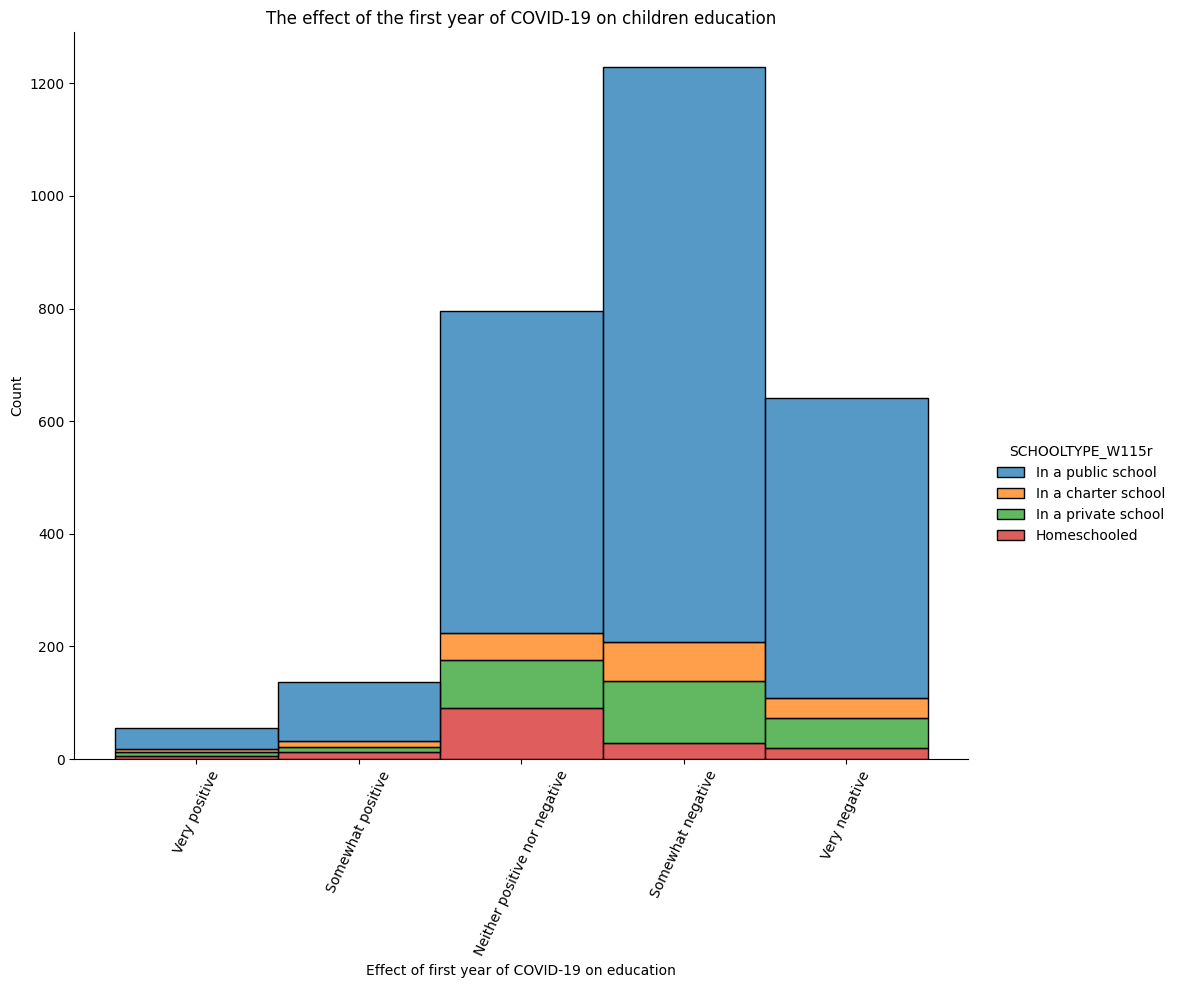

In [16]:
p = sb.displot(ATPW115_df, x='CVDEDUC1_W115r2', hue='SCHOOLTYPE_W115r', multiple="stack", height=8, aspect=1.25)
plt.title('The effect of the first year of COVID-19 on children education')
plt.xlabel('Effect of first year of COVID-19 on education')
plt.xticks(rotation=65)
plt.show()

# Now look at how beliefs on the first year effect of COVID are affected by child's gender




In [17]:
# See what all the possible responses are for the variable
ATPW115_df['CHGENDER_W115'].value_counts()

,count
CHGENDER_W115,
A boy,1697
A girl,1489
Other,24
Refused,21
Nonbinary,20


## First, handle missing data in the 'CHGENDER_W115' variable by recoding 'Refused', Other, and non-binary as Nan


---


##**Use | to separate multiple strings**

In [18]:
# Recode sting containing "refused", "other", "non-binary"
# Use | to separate the strings in str.contains()
ATPW115_df['CHGENDER_W115r'] = np.where(ATPW115_df['CHGENDER_W115'].str.contains('Refused|Nonbinary|Other'), np.nan, ATPW115_df['CHGENDER_W115'])
ATPW115_df['CHGENDER_W115r']

,CHGENDER_W115r
0,A girl
1,A boy
2,A boy
3,A girl
4,A boy
...,...
3752,A boy
3753,A girl
3754,A boy
3755,A girl


## Create cross tab and sig tab

In [19]:
# Code block 4b: More analysis with a crosstabulation (bivariate percentage table)
crosstab, sigtab = rp.crosstab(ATPW115_df.CVDEDUC1_W115r2, ATPW115_df.CHGENDER_W115r, prop='col', test='chi-square')
crosstab

/usr/local/lib/python3.10/dist-packages/researchpy/crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pearson Chi-square ( 4.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "


CHGENDER_W115r                
CHGENDER_W115r                         A boy  A girl     All
CVDEDUC1_W115r2                                             
Very positive                           1.65    2.15    1.88
Somewhat positive                       4.77    4.53    4.66
Neither positive nor negative          28.06   27.86   27.97
Somewhat negative                      42.82   43.59   43.18
Very negative                          22.70   21.87   22.32
All                                   100.00  100.00  100.00

## Table interpretation

**Cross tab**
- For **boys**, parents reported that the 1st yr of COVID effect was somewhat negative (41.53%)
-- neither positive nor negative (27.21%)
-- Very negative effect (22.02%)


- For **girls** students, parents reported that 1st yr of COVID effect was somewhat negative (41.83%)
-- neither positive/negative (26.73%)
-- Very negative (20.99%)


1st yr of COVID had
- higher **very positive** effect for girls than boys
- higher **somewhat positive** effect for boys than girls
- higher neither positive/negative effect for boys than girls
- higher **somewhat negative** effect for girls than boys
- higher **very negative** effect for boys than girls
- higher **not sure** effect for girls than boys



**Sig tab**
- p=0.005 = the table is reliable, meaning the pattern in the table is due to real differences in beliefs instead of random measurement error

In [20]:
sigtab

,Chi-square test,results
0,Pearson Chi-square ( 4.0) =,1.3139
1,p-value =,0.8590
2,Cramer's V =,0.0216


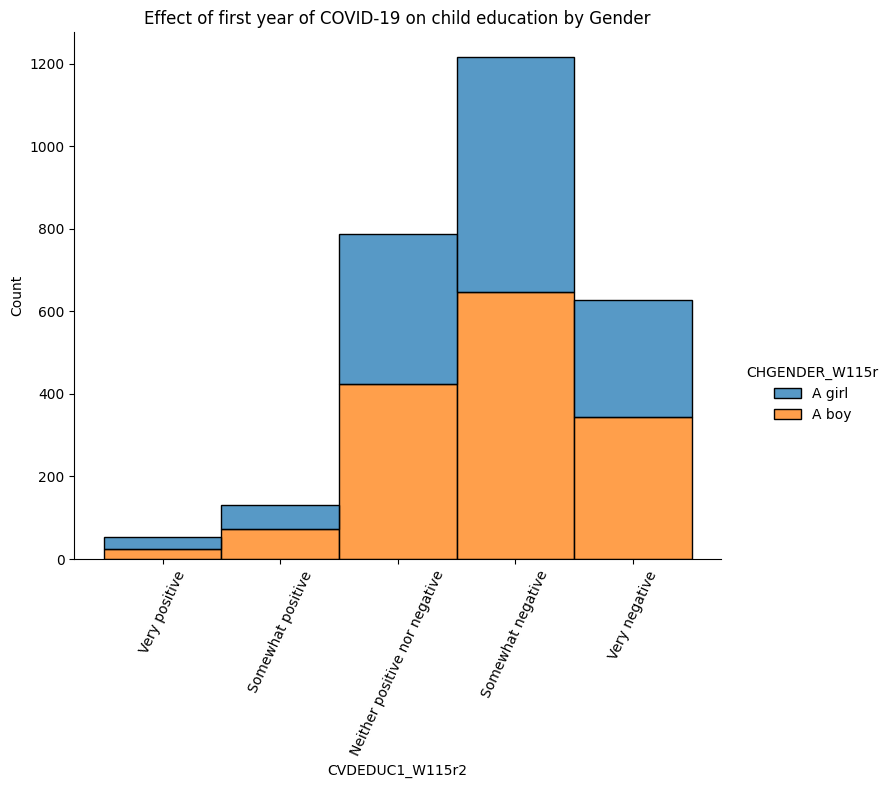

In [21]:
p = sb.displot(ATPW115_df, x='CVDEDUC1_W115r2', hue='CHGENDER_W115r', multiple="stack", height=6, aspect=1.25)
plt.title('Effect of first year of COVID-19 on child education by Gender')
plt.xticks(rotation=65)
plt.show()

In [22]:
ATPW115_df['F_BIRTHPLACE'].value_counts()

,count
F_BIRTHPLACE,
"U.S. – 50 states, District of Columbia",2845
Another country,806
U.S. – other territory,50
U.S. – Puerto Rico,36
Refused,20


# **Computing linear model without variables converting them to categoricals**

- Read in SPSS file and add convert_categoricals=False to preserve the numeric variables (it's TRUE by default)

## **Do NOT convert categoricals if you want to run the linear model**

In [65]:
# I'm going to read in some variables without converting them to categoricals in order to compute a linear model.

Raised_df = pd.read_spss('ATP W115.sav', usecols=['RAISED_W115', 'F_EDUCCAT',  'F_GENDER', 'F_AGECAT', 'EMPLSIT_W115', 'F_MARITAL', 'F_PARTY_FINAL', 'F_CREGION', 'F_RELIG', 'F_RACETHNMOD', 'F_METRO', 'F_HISP'], convert_categoricals=False)

## Create **BINARY** variables to id demo characteristics to model
- Divide the survey question into 2 categories (yes/no)
- Create variable to describe the high category vs the low category
- Set the new variable to 0 and then switch it to 1 for some respondents
- Code below uses a more condensed version of the np.where statement
-- Where is an if/then question


---

First, remove the refused or non-answers

In [36]:
# Recode sting containing "refused"
# Use | to separate the strings in str.contains()
ATPW115_df['F_EDUCCATr'] = np.where(ATPW115_df['F_EDUCCAT'].str.contains('Refused'), np.nan, ATPW115_df['F_EDUCCAT'])
ATPW115_df['F_EDUCCATr'].value_counts()

,count
F_EDUCCATr,
College graduate+,1942
Some College,1068
H.S. graduate or less,738


In [37]:
# Recode sting containing "refused" & "in some other way"
# Use | to separate the strings in str.contains()
ATPW115_df['F_GENDERr'] = np.where(ATPW115_df['F_GENDER'].str.contains('Refused|In some other way'), np.nan, ATPW115_df['F_GENDER'])
ATPW115_df['F_GENDERr'].value_counts()

,count
F_GENDERr,
A woman,2226
A man,1493


In [38]:
# Recode sting containing "refused"
# Use | to separate the strings in str.contains()
ATPW115_df['F_AGECATr'] = np.where(ATPW115_df['F_AGECAT'].str.contains('Refused'), np.nan, ATPW115_df['F_AGECAT'])
ATPW115_df['F_AGECATr'].value_counts()

,count
F_AGECATr,
30-49,2751
50-64,699
18-29,249
65+,53


In [39]:
# Recode sting containing "refused"
# Use | to separate the strings in str.contains()
ATPW115_df['F_MARITALr'] = np.where(ATPW115_df['F_MARITAL'].str.contains('Refused'), np.nan, ATPW115_df['F_MARITAL'])
ATPW115_df['F_MARITALr'].value_counts()

,count
F_MARITALr,
Married,2605
Living with a partner,360
Never been married,340
Divorced,276
Separated,107
Widowed,42


In [40]:
# Recode sting containing "refused" & "something else"
# Use | to separate the strings in str.contains()
ATPW115_df['F_PARTY_FINALr'] = np.where(ATPW115_df['F_PARTY_FINAL'].str.contains('Refused|Something else'), np.nan, ATPW115_df['F_PARTY_FINAL'])
ATPW115_df['F_PARTY_FINALr'].value_counts()

,count
F_PARTY_FINALr,
Democrat,1290
Independent,1072
Republican,879


In [41]:
# Recode sting containing "refused" & "something else"
# Use | to separate the strings in str.contains()
ATPW115_df['F_PARTY_FINALr'] = np.where(ATPW115_df['F_PARTY_FINAL'].str.contains('Refused|Something else'), np.nan, ATPW115_df['F_PARTY_FINAL'])
ATPW115_df['F_PARTY_FINALr'].value_counts()

,count
F_PARTY_FINALr,
Democrat,1290
Independent,1072
Republican,879


In [42]:
# Recode sting containing "refused"
# Use | to separate the strings in str.contains()
ATPW115_df['F_RELIGr'] = np.where(ATPW115_df['F_RELIG'].str.contains('Refused'), np.nan, ATPW115_df['F_RELIG'])
ATPW115_df['F_RELIGr'].value_counts()

,count
F_RELIGr,
Protestant,1484
Nothing in particular,784
Roman Catholic,741
Agnostic,198
Atheist,166
Mormon (Church of Jesus Christ of Latter-day Saints or LDS),90
Other,80
Jewish,54
Hindu,50


In [43]:
# Recode sting containing "refused"
# Use | to separate the strings in str.contains()
ATPW115_df['F_RACETHNMODr'] = np.where(ATPW115_df['F_RACETHNMOD'].str.contains('Refused'), np.nan, ATPW115_df['F_RACETHNMOD'])
ATPW115_df['F_RACETHNMODr'].value_counts()

,count
F_RACETHNMODr,
White non-Hispanic,1686
Hispanic,872
Black non-Hispanic,734
Asian non-Hispanic,329
Other,112


In [66]:
# Create some binary vectors to identify demographic characteristics to model.
# Divide the questions into categories - easier to read
# You can do this manually:
Raised_df['collegegrad'] = 1
Raised_df.loc[Raised_df['F_EDUCCAT'] == 1, ['collegegrad']] = 1

Raised_df['male'] = 1
Raised_df.loc[Raised_df['F_GENDER'] == 1, ['male']] = 1

Raised_df['age 18-29'] = 1
Raised_df.loc[Raised_df['F_AGECAT'] == 1, ['age 18-29']] = 1

Raised_df['fulltimepay'] = 1
Raised_df.loc[Raised_df['EMPLSIT_W115'] == 1, ['fulltimepay']] = 1

Raised_df['divorced'] = 1
Raised_df.loc[Raised_df['F_MARITAL'] == 3, ['divorced']] = 1

Raised_df['independent'] = 1
Raised_df.loc[Raised_df['F_PARTY_FINAL'] == 3, ['independent']] = 1

#F_CREGION does not have to be recoded
Raised_df['northeast'] = 1
Raised_df.loc[Raised_df['F_CREGION'] == 1, ['northeast']] = 1

Raised_df['protestant'] = 1
Raised_df.loc[Raised_df['F_RELIG'] == 1, ['protestant']] = 1

Raised_df['white'] = 1
Raised_df.loc[Raised_df['F_RACETHNMOD'] == 1, ['white']] = 1

#F_METRO does not have to be recoded
Raised_df['metro'] = 1
Raised_df.loc[Raised_df['F_METRO'] == 1, ['metro']] = 1

## Can create binaries using where
- Code is more efficient but harder to interpret
- Can create binaries using the code above (no where) or the code below (where) - don't need to do both

# **np.where(logical condition, value if true, value if false)**
Example looking at who is widowed and who is not
- **ATPW115_df['widowed'] = np.where(ATPW115_df['F_MARITAL'] == 5, 1, 0)**
- logical condition = ATPW115_df['F_MARITAL'] == 1 (in SPSS, widowed is coded as 5, so if F_MARITAL is set to 5)
- value if true = 1 (If ['F_MARITAL'] == 5, (TRUE) then recode it as 1
- value if false = 0 (If ['F_MARITAL'] !== 1, (FALSE -doesn't equal 5), then recode it as 0

In [67]:
# Or, you can use the where() method in the NumPy library to create a binary using
# a logical test, as I did above to code missing values.
# WHERE method
Raised_df['hispanic'] = np.where(Raised_df['F_HISP'] == 1, 1, 0)

# This is more efficient code, but harder to read when you're learning Python

Raised_df['hispanic'].value_counts()

,count
hispanic,
0,2885
1,872


In [68]:
#ATPW115_df.loc[ATPW115_df['RAISED_W115'] > 4, ['RAISED_W115']] = np.nan

# You can also write this as:
Raised_df['RAISED_W115r'] = np.where(Raised_df['RAISED_W115'] > 5, np.nan, Raised_df['RAISED_W115'])

In [86]:
# Linear model to predict whether they raise their children differently than how they were raised
Y = Raised_df['RAISED_W115'] # A higher score indicates more likely to raise children differently than own upbringing
X = Raised_df[['collegegrad', 'male', 'age 18-29', 'fulltimepay', 'divorced', 'independent', 'northeast', 'protestant', 'white', 'metro']]
X = sm.add_constant(X)
model0 = sm.OLS(Y, X, missing='drop').fit()
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:            RAISED_W115   R-squared:                      -0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    -4.176
Date:                Thu, 19 Dec 2024   Prob (F-statistic):               1.00
Time:                        18:49:54   Log-Likelihood:                -11780.
No. Observations:                3757   AIC:                         2.356e+04
Df Residuals:                    3755   BIC:                         2.358e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
collegegrad  1.379e+12   1.21e+13      0.114      

# **Summary**
- R-squared = -0.0001 - none of the variance in whether parents plan to raise their children differently than their own upbrining is explained by the model
- None of the explnaatory variables are statistically significant at p < 0.05

In [84]:
# This is the same model, with the recoded DV, showing the same results.
# Linear model to predict belief in climate crisis
Y = Raised_df['RAISED_W115r'] # A higher score indicates more likely to raise children differently than own upbrining
X = Raised_df[['collegegrad', 'male', 'age 18-29', 'fulltimepay', 'divorced', 'independent', 'northeast', 'protestant', 'white', 'metro']]
X = sm.add_constant(X)
model1 = sm.OLS(Y, X, missing='drop').fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:           RAISED_W115r   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 19 Dec 2024   Prob (F-statistic):                nan
Time:                        18:49:14   Log-Likelihood:                -6239.0
No. Observations:                3745   AIC:                         1.248e+04
Df Residuals:                    3744   BIC:                         1.249e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
collegegrad     0.3060      0.002    146.234      

In [82]:
Raised_df['similar'] = np.where(Raised_df['RAISED_W115'] > 2, 1, 0)
Raised_df['similar'].value_counts()

,count
similar,
1,2068
0,1689


In [83]:
# Logistic model to predict belief in whether they raise their children differently than how they were raised
Y = Raised_df['similar'] # binary measure of belief in raising chidren differently than own upbringing
X = Raised_df[['collegegrad', 'male', 'age 18-29', 'fulltimepay', 'divorced', 'independent', 'northeast', 'protestant', 'white', 'metro']]
X = sm.add_constant(X)
model2 = sm.Logit(Y, X, missing='drop').fit()
print(model2.summary())

Optimization terminated successfully.
         Current function value: 0.688050
         Iterations 3


LinAlgError: Singular matrix

In [74]:
# import pandas as pd
# import statsmodels.api as sm
# import numpy as np

# Calculate correlation matrix
correlation_matrix = X.corr()

# Print the correlation matrix
print(correlation_matrix)

# Identify highly correlated variables (e.g., above 0.8 or -0.8)
highly_correlated = correlation_matrix[correlation_matrix > 0.8]
print(highly_correlated)

             collegegrad  male  age 18-29  fulltimepay  divorced  independent  \
collegegrad          NaN   NaN        NaN          NaN       NaN          NaN   
male                 NaN   NaN        NaN          NaN       NaN          NaN   
age 18-29            NaN   NaN        NaN          NaN       NaN          NaN   
fulltimepay          NaN   NaN        NaN          NaN       NaN          NaN   
divorced             NaN   NaN        NaN          NaN       NaN          NaN   
independent          NaN   NaN        NaN          NaN       NaN          NaN   
northeast            NaN   NaN        NaN          NaN       NaN          NaN   
protestant           NaN   NaN        NaN          NaN       NaN          NaN   
white                NaN   NaN        NaN          NaN       NaN          NaN   
metro                NaN   NaN        NaN          NaN       NaN          NaN   

             northeast  protestant  white  metro  
collegegrad        NaN         NaN    NaN    NaN  
male  

In [62]:
model2_marginals = model2.get_margeff(at='median')
print(model2_marginals.summary())

NameError: name 'model2' is not defined

# Summary
- I tried to recode the variables
- But I got an error in the logistic regression model - same as the first time



---



## Activity (above)

1. Download a data file from the Pew Center. Copy the file to your Drive and read it into a data object.
2. Create a crosstabulation and a visualization to depict the relationship between a demographic variable and an attitudinal variable.
3. Create a linear model to predict the attitudinal variable.
4. Interpret the results.